In [ ]:
import numpy as np
import pandas as pd


#device = 'cuda' if cuda.is_available() else 'cpu'
#print(device)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/datasets/test_labels.csv')


In [ ]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in labels:
    print(label)
    print(train[label].value_counts().to_string())

toxic
0    144277
1     15294
severe_toxic
0    157976
1      1595
obscene
0    151122
1      8449
threat
0    159093
1       478
insult
0    151694
1      7877
identity_hate
0    158166
1      1405


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.preprocessing.text import Tokenizer
from nltk.stem import SnowballStemmer, LancasterStemmer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing import sequence
from keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.corpus import words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# word tokenization
data = train['comment_text'][0]
tokens = word_tokenize(data.lower())
print('Before tokenizing')
print(data)
print()
print('After tokenizing')
print(tokens)

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

# Trying stemming

# Porter's Stemmer is the oldest stemmer method. Porter's Stemmer applies a set of five sequential rule to determine common suffixes from sentences done with regular expressions
# Snowball stemmer is an updated version of Porter’s Stemmer with new rules. The process is exactly the same as Porter’s Stemmer
# Lancaster Stemmer rules are more agressive than Porter and Snowball and it is one of the most agressive stemmers. As a general rule of thumb, think that the rules of Lancaster’s Stemmer try to reduce the word to the shortest stem possible

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

new_tokens_snowball = []
snowball = SnowballStemmer(language='english')
for token in tokens:
    new_tokens_snowball.append(snowball.stem(token))
print()
print('After snowball stemmer')
print(new_tokens_snowball)

new_tokens_lancaster = []
lancaster = LancasterStemmer()
for token in tokens:
    new_tokens_lancaster.append(lancaster.stem(token))
print()
print('After lancaster stemmer')
print(new_tokens_lancaster)
# stemming does not refer to the root of the word

# Trying lemmatization
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

new_tokens_lemmatizer = []
lemmatizer = WordNetLemmatizer()
for token in tokens:
    new_tokens_lemmatizer.append(lemmatizer.lemmatize(token, get_pos(token)))
print()
print('After wordnet lemmatizer')
print(new_tokens_lemmatizer)

Before tokenizing
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

After tokenizing
['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', '?', 'they', 'were', "n't", 'vandalisms', ',', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', '.', 'and', 'please', 'do', "n't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'i', "'m", 'retired', 'now.89.205.38.27']

After porter stemmer
['explan', 'whi', 'the', 'edit', 'made', 'under', 'my', 'usernam', 'hardcor', 'metallica', 'fan', 'were', 'revert', '?', 'they', 'were', "n't", 'vandal', ',', 'just', 'closur', 'on', 'some', 'ga', 'after', 'i', 'vote', 'at', 'new', 'york', 'doll', 'fac', '.'

In [ ]:
train.drop('id', axis=1, inplace=True)
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
bigX = train.drop(labels,axis=1).to_numpy().reshape(-1,)
bigy = train[labels].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dev, X_test, y_train_dev, y_test = train_test_split(bigX, bigy,
                                                    test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_dev, y_train_dev,
                                                    test_size=0.2)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(bigX)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix_train = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_val)
sequences_matrix_val = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(bigX)
sequences_matrix_big = pad_sequences(sequences,maxlen=max_len)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 97,622
Trainable params: 97,622
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(sequences_matrix_train,
                    y_train,
                    epochs=1,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))

200/200 [==============================] - 98s 479ms/step - loss: 0.1681 - accuracy: 0.9823 - val_loss: 0.1390 - val_accuracy: 0.9938


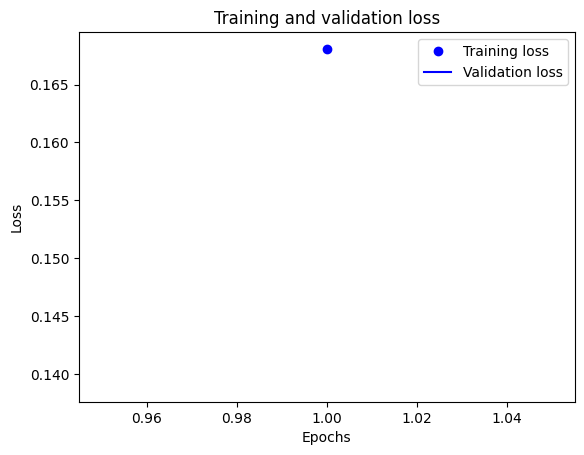

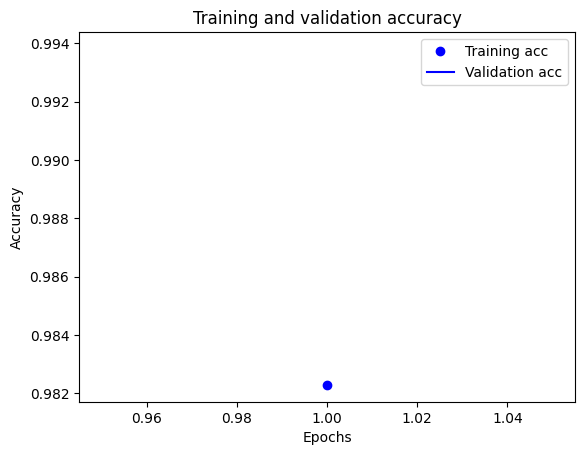

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(sequences_matrix_test, y_test)

998/998 [==============================] - 16s 16ms/step - loss: 0.1356 - accuracy: 0.9940


Epoch 1/10
312/312 [==============================] - 144s 454ms/step - loss: 0.1577 - accuracy: 0.9835 - val_loss: 0.1342 - val_accuracy: 0.9936
Epoch 2/10
312/312 [==============================] - 139s 445ms/step - loss: 0.0990 - accuracy: 0.9934 - val_loss: 0.0780 - val_accuracy: 0.9938
Epoch 3/10
312/312 [==============================] - 145s 464ms/step - loss: 0.0724 - accuracy: 0.9942 - val_loss: 0.0692 - val_accuracy: 0.9938
Epoch 4/10
312/312 [==============================] - 144s 462ms/step - loss: 0.0679 - accuracy: 0.9942 - val_loss: 0.0721 - val_accuracy: 0.9938
Epoch 5/10
312/312 [==============================] - 144s 461ms/step - loss: 0.0658 - accuracy: 0.9942 - val_loss: 0.0657 - val_accuracy: 0.9938
Epoch 6/10
312/312 [==============================] - 144s 462ms/step - loss: 0.0646 - accuracy: 0.9942 - val_loss: 0.0644 - val_accuracy: 0.9938
Epoch 7/10
312/312 [==============================] - 142s 456ms/step - loss: 0.0642 - accuracy: 0.9942 - val_loss: 0.0644 -

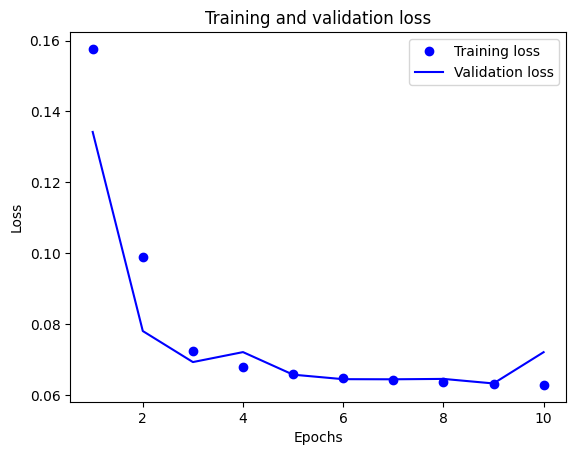

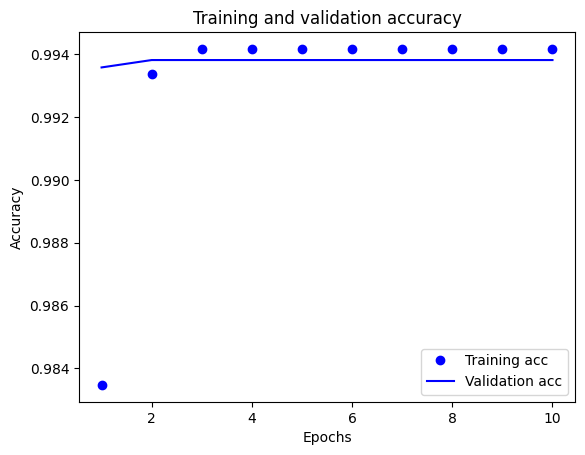

998/998 [==============================] - 17s 17ms/step - loss: 0.0689 - accuracy: 0.9940


[0.06892089545726776, 0.9939526915550232]

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(sequences_matrix_big,
                    bigy,
                    epochs=10,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))


acc = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model.evaluate(sequences_matrix_test, y_test)

In [ ]:
results = model.evaluate(sequences_matrix_test, y_test)

998/998 [==============================] - 17s 17ms/step - loss: 0.0689 - accuracy: 0.9940
